# Mountain Car Miniproject Tutorial Notebook

This notebook is here to guide you through the basics of the frameworks necessary for you to do well on your CS456-Miniproject 🤓

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

## Gymnasium environments

One of the main and most spread environment developer in the field of RL research is [Gymnasium](https://gymnasium.farama.org/). They provide standardized environments offering a large range of difficulties and setups, that are perfectly designed to benchmark performances of RL and Deep RL algorithms.

The main structure is very simple to understand. First, we need to instantiate our environment. We will use an existing environment, but one could also use their structure to design their own environment.

Let's directly work with the Mountain Car environment that will be used in the project. 

_PS: If you're more curious, feel free to browse the large list available on their website!_

In [2]:
env = gym.make('MountainCar-v0')

The environment contains an action space and an observation (state) space. Let's see what these look like.

In [3]:
print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")

Action space: Discrete(3)
Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [4]:
print(f"Number of actions available: {env.action_space.n}")
print(f"Observation shape: {env.observation_space.shape}")

Number of actions available: 3
Observation shape: (2,)


As we can see, the action space of that first environment is discrete and contains 3 possible actions: accelerate to the left, don't accelerate and accelerate to the right. 

The observation space has a dimension of 2, and you can find what each part represents [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/#observation-space).

Before taking actions, the environment should be reset (or boostrapped). **Note: this should be done every time the environment has to be restarted, i.e., at the end of any episode.**

In [5]:
# the second return value is an info dictionary, but it doesn't contain anything in this environment
starting_state, _ = env.reset() 

print(f"Starting state: {starting_state}")

Starting state: [-0.57766664  0.        ]


Now that we know what the actions look like and that the environment is ready, we can take actions inside it. This is done using the `env.step` function, that takes an action as input, and returns multiple values. More details on each of them can be found [here](https://gymnasium.farama.org/api/env/#gymnasium.Env.step).

In the project, you will have an agent that will choose an action (based on the policy learned) given the current state. However, for now, we can simply sample actions at random using `action_space.sample()`.

In [6]:
action = env.action_space.sample()
print(f"Sampled action: {action}")
next_state, reward, terminated, truncated, _ = env.step(action) # again, the last return value is an empty info object

print(f"Next state: {next_state}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}")
print(f"Truncated: {truncated}")

Sampled action: 1
Next state: [-5.772629e-01  4.037330e-04]
Reward: -1.0
Terminated: False
Truncated: False


The `terminated` and `truncated`  variables represent the two ways that the episode might be done. Thus, it might be handy to use
```
done = terminated or truncated
```
in your code. 💡

We now have all the pieces necessary to run a full episode!

In [7]:
done = False
state, _ = env.reset()
episode_reward = 0

while not done:
    action = env.action_space.sample()
    next_state, reward, terimnated, truncated, _ = env.step(action)

    episode_reward += reward

    state = next_state
    done = terminated or truncated

print(f"Episode reward after taking random actions: {episode_reward}")

Episode reward after taking random actions: -200.0


Now your goal in the project will be to code an agent that can beat that 🙃

## Random Agent Class

This code block describes the implementation of a random agent as described in task 2 of the project handout.

In [8]:
class RandomAgent:
    def __init__(self, environment):
        self.env = environment

    def observe(self, state, action, next_state, reward):
        # This method is just a placeholder for the random agent, as it doesn't learn from observations.
        pass

    def select_action(self, state):
        # Randomly select an action from the action space
        return self.env.action_space.sample()

    def update(self):
        # No update necessary for a random agent.
        pass

Run the agent on the environment until the episode is either truncated or terminated. Store the episode and render (visualize) it.

In [9]:
def run_single_episode(agent):
    """Run the RandomAgent for a single episode
    """
    done = False
    state, _ = agent.env.reset()
    episode_reward = 0
    states = [state]

    while not done:
        action = agent.select_action(state)
        next_state, reward, terminated, truncated, _ = agent.env.step(action)
        episode_reward += reward
        
        # observe and update does not do anything for the random agent
        agent.observe(state, action, next_state, reward)
        agent.update()
        
        state = next_state
        states.append(state)

        done = terminated or truncated

    return episode_reward, states

In [10]:
def plot_states_over_time(states):
    """Plot a run of a single episode for the RandomAgent.
    """
    # Extract positions and velocities from states
    positions = [s[0] for s in states]
    velocities = [s[1] for s in states]
    timesteps = list(range(len(states)))

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(timesteps, positions, label='Position')
    plt.title('Car Position Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(timesteps, velocities, label='Velocity')
    plt.title('Car Velocity Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

Episode reward after taking random actions: -200.0


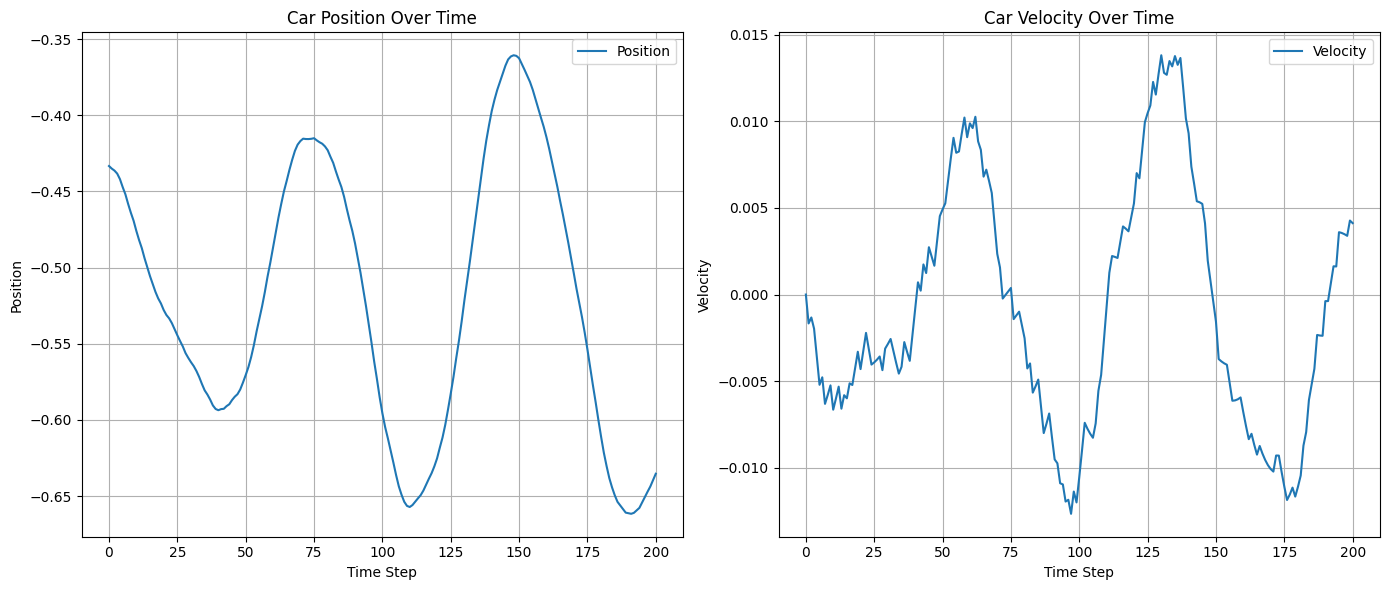

In [11]:
env = gym.make("MountainCar-v0")
random_agent = RandomAgent(env)
episode_reward, states = run_single_episode(random_agent)
print(f"Episode reward after taking random actions: {episode_reward}")
plot_states_over_time(states)

Run the agent for 100 episodes. At every episode initialize the environment with a new randomly sampled seed. Plot the duration of each episode as a scatter plot.

In [12]:
def run_multiple_episodes(agent, num_episodes=100):
    episode_durations = []

    for _ in range(num_episodes):
        done = False
        state = agent.env.reset()
        episode_length = 0

        while not done:
            action = agent.select_action(state)
            state, _, terminated, truncated, _ = agent.env.step(action)
            episode_length += 1
            done = terminated or truncated
        
        episode_durations.append(episode_length)
    
    return episode_durations

In [13]:
def plot_episode_durations(episode_durations):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(episode_durations)), episode_durations, alpha=0.6)
    plt.title("Duration of Each Episode")
    plt.xlabel("Episode Number")
    plt.ylabel("Duration (in steps)")
    plt.grid(True)
    plt.show()

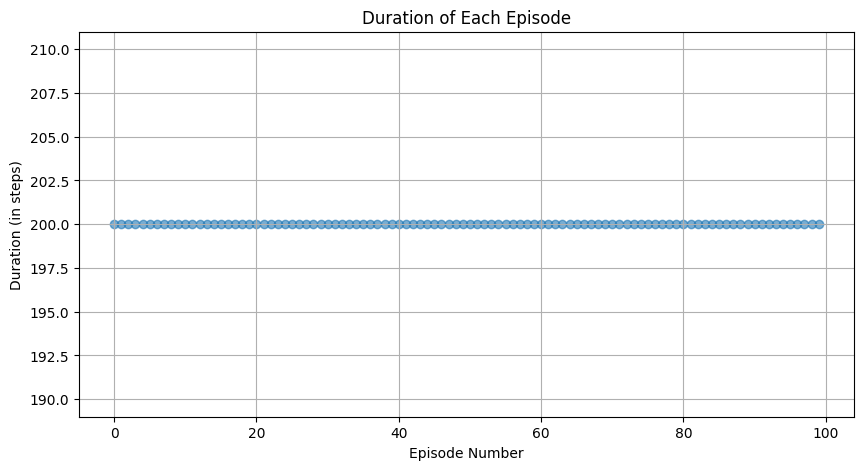

In [14]:
env = gym.make("MountainCar-v0")
random_agent = RandomAgent(env)
durations = run_multiple_episodes(random_agent, 100)
plot_episode_durations(durations)

## DQN Agent Class

This code block describes the implementation of a DQN agent as described in task 3 of the project handout.

In [11]:
class DQNAgent:
    def __init__(self, Q, gamma, epsilon, replay_buffer, batch_size, optimizer):
        self.Q = Q
        self.gamma = gamma
        self.epsilon = epsilon
        self.replay_buffer = replay_buffer
        self.batch_size = batch_size
        self.optimizer = optimizer

    def observe(self, state, action, next_state, reward):
        pass

    def select_action(self, state):
        pass

    def update(self):
        pass

## Dyna Agent Class

This code block describes the implementation of a Dyna agent as described in task 4 of the project handout.

In [ ]:
class DynaAgent:
    def __init__(self, discr_step, gamma, epsilon, k, P_hat, R_hat, Q):
        self.discr_step = discr_step
        self.gamma = gamma
        self.epsilon = epsilon
        self.k = k
        self.P_hat = P_hat
        self.R_hat = R_hat
        self.Q = Q

    def observe(self, state, action, next_state, reward):
        pass

    def select_action(self, state):
        pass

    def update(self):
        pass